###Defining the question

**a) Specifying the question<br>**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**b) Defining metrics of success<br>**

For our analysis to be considered successful, we must be able to:<br>

Perform explorative data analysis.<br>
Create a prediction model with high accuracy<br>
Predict how many goals the home team scores.<br>
Predict how many goals the away team scores.<br>
Predict whether a match/game is a Win, Lose or Draw


**c) Understanfing the context**

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. 
The rankings are calculated using an algorithm called Elo. The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

**d) Experimental Design**<br>
* Defining the Question
* Data preparation
* Data Cleaning
* Merging the Dataframes
* Performing EDA
* Prediction Models
* Checking accuracy for our models
* Challenging the solution and conclusion





###Data preparation


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading our datasets
results = pd.read_csv("/content/results.csv")
ranking = pd.read_csv("/content/fifa_ranking.csv")

In [3]:
#previewing
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
#previewing
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
#previewing
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#previewing
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
#checking theshape ofour dataframes
print(results.shape)
print(ranking.shape)

(40839, 9)
(57793, 16)


In [8]:
#getting information about our datasets
results.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [9]:
#getting information about our datasets
ranking.info

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

###Data Cleaning

In [10]:
#checking for missing values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:
#checking for duplicated values
results.duplicated().sum()

0

In [12]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
#dropping columns that we will not need
results.drop(['city'],axis=1, inplace=True)

In [14]:
#checking missing values
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
#checking duplicated values
ranking.duplicated().sum()

37

In [16]:
#dropping duplicated values
ranking.drop_duplicates(inplace = True)

In [17]:
#confirming duplicated values
ranking.duplicated().sum()

0

In [18]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [19]:
#droping columns from ranking that we will not need
ranking.drop(['country_abrv', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',	'last_year_avg_weighted', 'two_year_ago_avg',	'two_year_ago_weighted', 'three_year_ago_avg',	'three_year_ago_weighted', 'confederation'], axis = 1, inplace = True)

In [20]:
ranking.columns

Index(['rank', 'country_full', 'rank_date'], dtype='object')

In [21]:
#previewing cleaned ranking dataset
ranking.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [22]:
#previewing cleaned results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [23]:
#checking datatypes
ranking.dtypes

rank             int64
country_full    object
rank_date       object
dtype: object

In [24]:
#checking datatypes
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
country       object
neutral         bool
dtype: object

In [25]:
#Changing date data type for both datasets to datetype fromobject
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])
print(results.info())
print(ranking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   country     40839 non-null  object        
 7   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 2.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          57756 non-null  int64         
 1   country_full  57756 non-null  object        
 2   rank_date     57

In [26]:
#checking unique years
results['year'] = results['date'].dt.year
results.year.unique()


array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [27]:
#checking unique years
ranking['year'] = ranking['rank_date'].dt.year
ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [28]:
#resorted to using the year 2015-2018 Since it takes 4 years for worldcup to 
#occur. we ommittted 2019 because ranking dataset does not have 2019
resultsf = results.loc[(results['year'] < 2019) & (results['year'] > 2014)]
resultsf

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year
36609,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015
36610,2015-01-04,Iran,Iraq,1,0,Friendly,Australia,True,2015
36611,2015-01-04,South Korea,Saudi Arabia,2,0,Friendly,Australia,True,2015
36612,2015-01-04,South Africa,Zambia,1,0,Friendly,South Africa,False,2015
36613,2015-01-05,China PR,Oman,4,1,Friendly,Australia,True,2015
...,...,...,...,...,...,...,...,...,...
40346,2018-12-30,Yemen,Syria,0,1,Friendly,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Qatar,True,2018


In [29]:
#merge our final results dataset to ranking dataset based on the home_team column
mergeddataset = resultsf.merge(ranking, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,rank,country_full,rank_date
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,103,Bahrain,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,104,Bahrain,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,108,Bahrain,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,108,Bahrain,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...
34307,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,South Sudan,False,2018,153,South Sudan,2018-02-15
34308,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,South Sudan,False,2018,154,South Sudan,2018-03-15
34309,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,South Sudan,False,2018,155,South Sudan,2018-04-12
34310,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,South Sudan,False,2018,157,South Sudan,2018-05-17


In [30]:
#merge the merged dataset again to the ranking column based on the away team column
mergeddataset = mergeddataset.merge(ranking, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08,93,Jordan,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08,97,Jordan,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08,101,Jordan,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347875,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,False,2018,125,Togo,2018-06-07,163,Gambia,2018-02-15
347876,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,False,2018,125,Togo,2018-06-07,164,Gambia,2018-03-15
347877,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-04-12
347878,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-05-17


In [31]:
#get information of our final merged dataset
mergeddataset.info

<bound method DataFrame.info of              date home_team away_team  ...  rank_y  country_full_y rank_date_y
0      2015-01-04   Bahrain    Jordan  ...      93          Jordan  2015-01-08
1      2015-01-04   Bahrain    Jordan  ...      97          Jordan  2015-02-12
2      2015-01-04   Bahrain    Jordan  ...     101          Jordan  2015-03-12
3      2015-01-04   Bahrain    Jordan  ...     103          Jordan  2015-04-09
4      2015-01-04   Bahrain    Jordan  ...     103          Jordan  2015-05-07
...           ...       ...       ...  ...     ...             ...         ...
347875 2018-10-12      Togo    Gambia  ...     163          Gambia  2018-02-15
347876 2018-10-12      Togo    Gambia  ...     164          Gambia  2018-03-15
347877 2018-10-12      Togo    Gambia  ...     175          Gambia  2018-04-12
347878 2018-10-12      Togo    Gambia  ...     175          Gambia  2018-05-17
347879 2018-10-12      Togo    Gambia  ...     172          Gambia  2018-06-07

[347880 rows x 15 c

In [32]:
#check our merged dataset columns
mergeddataset.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'year', 'rank_x', 'country_full_x',
       'rank_date_x', 'rank_y', 'country_full_y', 'rank_date_y'],
      dtype='object')

In [33]:
#drop unneeded columns from our merged dataset
mergeddataset = mergeddataset.drop(columns=[ 'country', 'neutral', 'year', 'country_full_x', 'country_full_y'])

In [34]:
#reduce our merged dataset to dates that match
mergeddataset = mergeddataset[mergeddataset.rank_date_x == mergeddataset.rank_date_y]
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
13,2015-01-04,Bahrain,Jordan,1,0,Friendly,103,2015-02-12,97,2015-02-12
26,2015-01-04,Bahrain,Jordan,1,0,Friendly,104,2015-03-12,101,2015-03-12
39,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-04-09,103,2015-04-09
52,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-05-07,103,2015-05-07
...,...,...,...,...,...,...,...,...,...,...
347851,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-02-15,163,2018-02-15
347858,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-03-15,164,2018-03-15
347865,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,129,2018-04-12,175,2018-04-12
347872,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-05-17,175,2018-05-17


In [35]:
#check for duplicates on merged dataset across all columns
mergeddataset.duplicated().sum()

0

In [36]:
#confirm whether we have any duplicated matches considering only match defining columns
mergeddataset.duplicated(subset=['date','home_team','away_team','home_score','away_score','tournament']).sum()

28124

We realise some matches may have been duplicated to have more than one ranking. We therefore keep the first record of each match appearance and get rid of the rest below

In [37]:
mergeddataset.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,2015-01-08,93,2015-01-08
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,2015-01-08,93,2015-01-08
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,2015-01-08,93,2015-01-08
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,2015-01-08,93,2015-01-08
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,2018-01-18,143,2018-01-18
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,2018-01-18,143,2018-01-18
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,2018-01-18,143,2018-01-18
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,2018-01-18,153,2018-01-18


In [38]:
mergeddataset = mergeddataset.drop(columns=['rank_date_x', 'rank_date_y'])

In [39]:
mergeddataset.rename(columns={'rank_x':'hometeam_rank', 'rank_y':'awayteam_rank'},inplace=True)
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,hometeam_rank,awayteam_rank
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93
...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153


In [40]:
#checkin the unique tournament types
mergeddataset['tournament'].unique()

array(['Friendly', 'AFC Asian Cup', 'FIFA World Cup qualification',
       'Copa América', 'African Nations Championship',
       'African Cup of Nations', 'African Cup of Nations qualification',
       'COSAFA Cup', 'CECAFA Cup', 'Gold Cup', 'EAFF Championship',
       'SAFF Cup', 'UEFA Euro qualification', 'ABCS Tournament',
       'Windward Islands Tournament', 'Oceania Nations Cup qualification',
       'AFC Asian Cup qualification', 'AFC Challenge Cup',
       'AFF Championship', 'CFU Caribbean Cup qualification',
       'Baltic Cup', 'UEFA Euro', 'Kirin Cup',
       'Copa América qualification', "King's Cup", 'Oceania Nations Cup',
       'Confederations Cup', 'UNCAF Cup', 'CFU Caribbean Cup',
       'FIFA World Cup', 'UEFA Nations League', 'Intercontinental Cup'],
      dtype=object)

In [41]:
#reducing the tournaments to world cup, friendly and others as specified in question.
def tourna(i):
  if i == 'FIFA World Cup':
    return 'World Cup'
  elif i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

mergeddataset['tournament_type'] = mergeddataset.tournament.apply(lambda x: tourna(x))

In [42]:
def match_result(i):
  if i['home_score'] > i['away_score']:
    outcome = 'Win'
  elif i['home_score'] < i['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

mergeddataset['result'] = mergeddataset.apply(match_result, axis=1)

In [43]:
mergeddataset

,date,home_team,away_team,home_score,away_score,tournament,hometeam_rank,awayteam_rank,tournament_type,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,Friendly,Win
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,Friendly,Win
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,Other,Win
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,Other,Lose
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,Other,Lose
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,Friendly,Draw
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,Other,Draw
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,Other,Lose
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,Other,Win


###Exploratory data analysis

####Univariate analysis

In [44]:
#getting information for our merged dataset
mergeddataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 347844
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2942 non-null   datetime64[ns]
 1   home_team        2942 non-null   object        
 2   away_team        2942 non-null   object        
 3   home_score       2942 non-null   int64         
 4   away_score       2942 non-null   int64         
 5   tournament       2942 non-null   object        
 6   hometeam_rank    2942 non-null   int64         
 7   awayteam_rank    2942 non-null   int64         
 8   tournament_type  2942 non-null   object        
 9   result           2942 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 252.8+ KB


In [45]:
#getting the statistical summary of the merged dataset
mergeddataset.describe()

,home_score,away_score,hometeam_rank,awayteam_rank
count,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.526852,1.041808,82.706322,85.820190
std,1.515799,1.211115,56.652920,56.713522
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,34.000000,37.000000
50%,1.000000,1.000000,75.000000,78.000000
75%,2.000000,2.000000,124.000000,129.000000
max,15.000000,8.000000,209.000000,209.000000


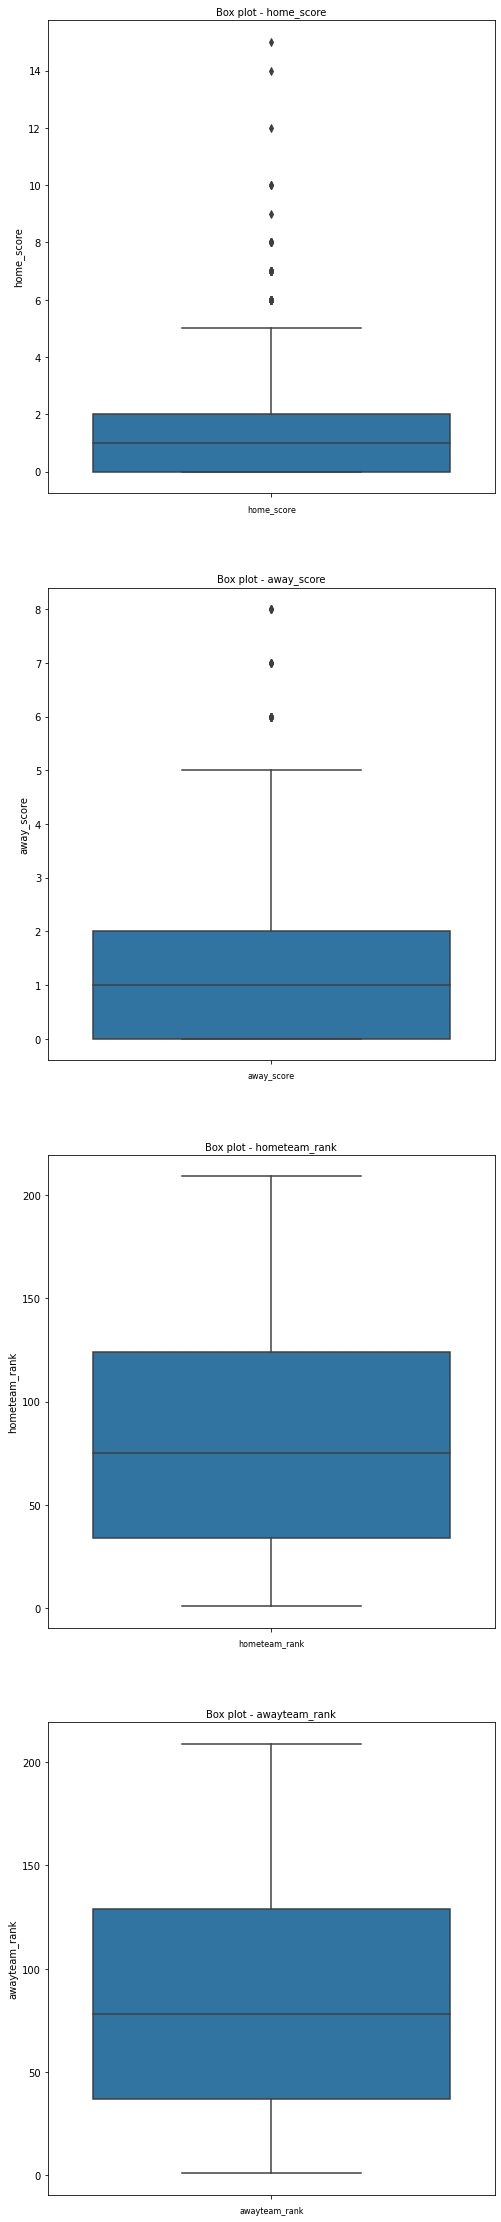

In [46]:
col_names = ['home_score','away_score', 'hometeam_rank', 'awayteam_rank']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = mergeddataset[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

outliers only present in the scores columns. Probably because of high scoring matches thus we will keep them

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

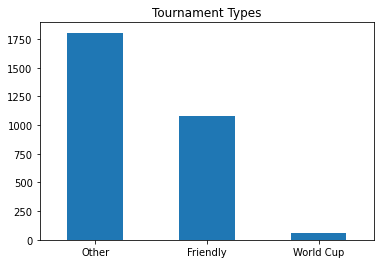

In [47]:
mergeddataset.tournament_type.value_counts().plot.bar()
plt.title('Tournament Types')
degrees = 0
plt.xticks(rotation=degrees)

friendlies are higher in comparison to the worlsd cup matches probably because worldcups occur once in four years. Others is leading. We therefore breakdown others and plot below again to see each tournament individually

Text(0.5, 1.0, 'Tournaments')

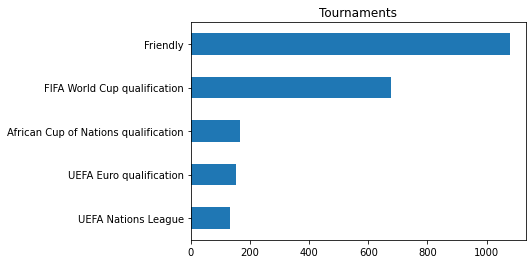

In [48]:
mergeddataset.tournament.value_counts().head(5).sort_values().plot.barh()
plt.title('Tournaments')
# Friendly matches hold the top spot in the tournaments field

Friendly tournaments are still most followed by the Fifaworld cup qualification

In [49]:
mergeddataset.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'hometeam_rank', 'awayteam_rank', 'tournament_type',
       'result'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

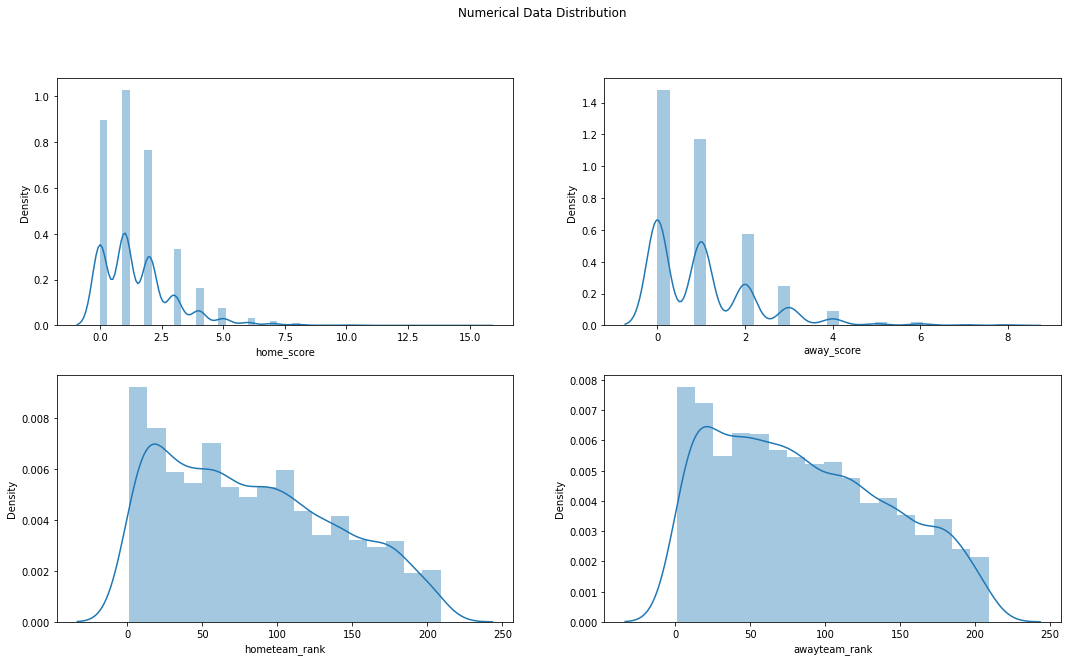

In [50]:
#checking the distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Numerical Data Distribution')


sns.distplot( mergeddataset["home_score"] , ax=axes[0, 0])
sns.distplot( mergeddataset["away_score"] , ax=axes[0, 1])
sns.distplot( mergeddataset["hometeam_rank"] , ax=axes[1, 0])
sns.distplot( mergeddataset["awayteam_rank"] , ax=axes[1, 1])

Our dataset is normally distributed

####Bivariate analysis

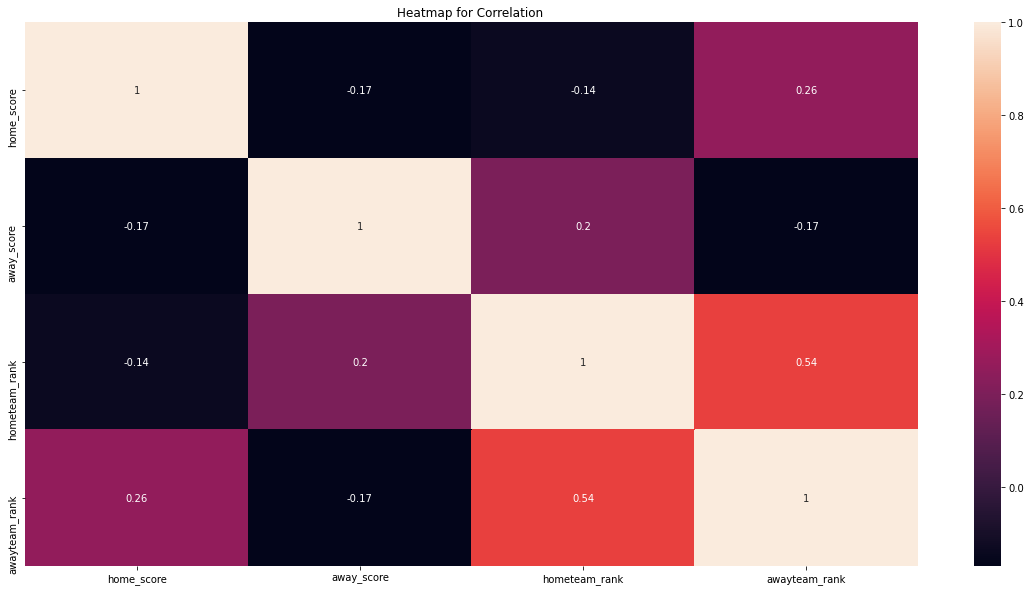

In [51]:
cor = mergeddataset.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

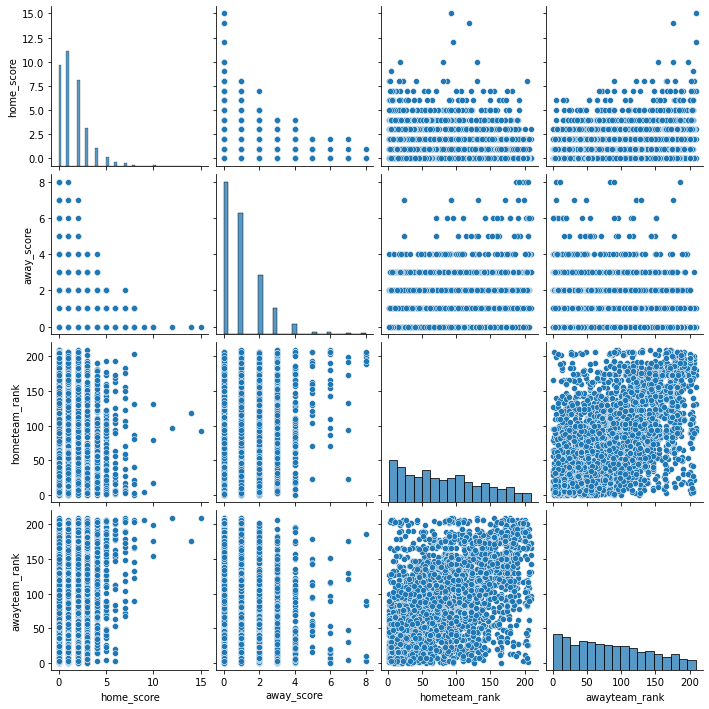

In [52]:
# Ploting scatterplots of all numeric columns
sns.pairplot(mergeddataset)
plt.show()

###Polynomial regression

In [53]:
model=mergeddataset.copy()
model.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'hometeam_rank', 'awayteam_rank', 'tournament_type',
       'result'],
      dtype='object')

In [54]:
model['tournament_type'] = model['tournament_type'].astype('category')
model['result'] = model['result'].astype('category')

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

model['tournament_type'] = labelencoder.fit_transform(model['tournament_type'])
model['result'] = labelencoder.fit_transform(model['result'])

Predicting home score below

In [55]:
model.describe()

,home_score,away_score,hometeam_rank,awayteam_rank,tournament_type,result
count,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.526852,1.041808,82.706322,85.820190,0.653297,1.221278
std,1.515799,1.211115,56.652920,56.713522,0.515771,0.819465
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,37.000000,0.000000,1.000000
50%,1.000000,1.000000,75.000000,78.000000,1.000000,1.000000
75%,2.000000,2.000000,124.000000,129.000000,1.000000,2.000000
max,15.000000,8.000000,209.000000,209.000000,2.000000,2.000000


In [56]:
X = model[['hometeam_rank', 'awayteam_rank','tournament_type']]
y = model['home_score']

####Multicolinearity

In [57]:
corr=X.corr()

In [58]:
#Checking the VIF
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


,hometeam_rank,awayteam_rank,tournament_type
hometeam_rank,1.402613,-0.751468,0.000145
awayteam_rank,-0.751468,1.403378,0.027672
tournament_type,0.000145,0.027672,1.000769


We will not drop any column because the VIFs are okay(close to 1)

In [59]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [60]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# #Visualize the Polynomial Regression results
# plt.scatter(X, y) 
# plt.plot(X, pol_reg.predict(X_poly), color='red')
# plt.title('hometeam score Prediction')
# plt.xlabel('determinants')
# plt.ylabel('Home score')
# plt.show()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred


array([1.10719464, 1.17497864, 1.77430608, ..., 1.43242982, 2.28313383,
       2.04537322])

In [63]:
#evaluating our model
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse


0.18796281307174756


1.3657013937166484

In [64]:
#Trying with three degrees of freedom
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(X_poly)
y_pred
#calculating rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.2028258081163994


1.353145222979272

In [65]:
#Trying with 4 degrees of freedom
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(X_poly)
y_pred
#calculating rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.21074439099909537


1.3464078407709192

In [66]:
#Trying with 6 degrees of freedom
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(X_poly)
y_pred
#calculating rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.22086577927387618


1.3377468388804403

We will go with 2 degrees of freedom because the rmse is the least in comparison to the mean of dependent variable

Predicting away score below

In [67]:
model.describe()

,home_score,away_score,hometeam_rank,awayteam_rank,tournament_type,result
count,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.526852,1.041808,82.706322,85.820190,0.653297,1.221278
std,1.515799,1.211115,56.652920,56.713522,0.515771,0.819465
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,37.000000,0.000000,1.000000
50%,1.000000,1.000000,75.000000,78.000000,1.000000,1.000000
75%,2.000000,2.000000,124.000000,129.000000,1.000000,2.000000
max,15.000000,8.000000,209.000000,209.000000,2.000000,2.000000


In [68]:
X = model[['hometeam_rank', 'awayteam_rank','tournament_type']]
y = model['away_score']

In [69]:
corr=X.corr()
#Checking the VIF
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,hometeam_rank,awayteam_rank,tournament_type
hometeam_rank,1.402613,-0.751468,0.000145
awayteam_rank,-0.751468,1.403378,0.027672
tournament_type,0.000145,0.027672,1.000769


In [70]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred

#evaluating our model
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.17048337425519156


1.1028694703028512

In [71]:
#Trying with 4 degrees of freedom
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(X_poly)
y_pred
#calculating rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.18765915312250525


1.0913918666437072

In [72]:
#Trying with 6 degrees of freedom
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(X_poly)
y_pred
#calculating rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(r2)
rmse

0.19734117225247816


1.084868403134262

We will use 2 degrees of freedom

###Logistic regression

We had done feature engingineering before to get the result column that displays whether match was win, lose or draw.

In [73]:
model

,date,home_team,away_team,home_score,away_score,tournament,hometeam_rank,awayteam_rank,tournament_type,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,0,2
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,0,2
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,1,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,1,1
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,1,1
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,0,0
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,1,0
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,1,1
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,1,2


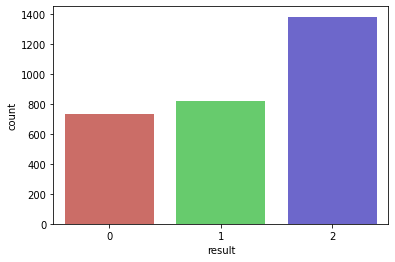

In [74]:
# Checking our target variable

sns.countplot(x='result',data=model, palette='hls')

In [77]:
# Splitting our dataset
#
X = model.drop(columns= ['date',	'home_team',	'away_team', 'tournament', 'result'])
y = model['result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[226,   0,   0],
       [  0, 253,   0],
       [  0,   0, 404]])

####Hyperparameter tuning

In [78]:
model.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'hometeam_rank', 'awayteam_rank', 'tournament_type',
       'result'],
      dtype='object')

In [80]:
#splitting our independent and dependent variables
X = model.drop(["result", 'date','home_team', 'away_team', 'tournament'],axis=1)
y = model["result"]

# Performing Data Preprocessing
# ---
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
#performing random search
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X,y)

search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

The above are our best parameters

###Conclusion

Logistic regression produced an accurate prediction model.<br>
However for polynomial regression, the Root mean Square errors we were getting were questionable in comparison to 10% the target mean. We therefore advocate for using a different kind of regression maybe for predicting the home and away scores